In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib

In [3]:
time_line_fox = pd.read_csv('/Users/sandrobarreshamers/github/krweb/Query_files/time_line_fox.csv')
print(time_line_fox)

                          event             datetime  \
0    http://example.com/e_FOX_1  2021-01-06T10:02:00   
1    http://example.com/e_FOX_2  2021-01-06T11:00:00   
2    http://example.com/e_FOX_3  2021-01-06T13:10:00   
3    http://example.com/e_FOX_4  2021-01-06T13:47:00   
4    http://example.com/e_FOX_5  2021-01-06T14:00:00   
5    http://example.com/e_FOX_6  2021-01-06T14:20:00   
6    http://example.com/e_FOX_7  2021-01-06T14:40:00   
7    http://example.com/e_FOX_8  2021-01-06T15:30:00   
8    http://example.com/e_FOX_9  2021-01-06T15:36:00   
9   http://example.com/e_FOX_10  2021-01-06T16:00:00   
10  http://example.com/e_FOX_11  2021-01-06T16:10:00   
11  http://example.com/e_FOX_12  2021-01-06T16:25:00   
12  http://example.com/e_FOX_13  2021-01-06T17:00:00   
13  http://example.com/e_FOX_14  2021-01-06T17:15:00   
14  http://example.com/e_FOX_15  2021-01-06T17:30:00   
15  http://example.com/e_FOX_16  2021-01-06T18:00:00   

                             location          

In [4]:
# extract the events from the 'event' column and store them in a list
events_fox = time_line_fox['event'].str.split('/').str[-1].str.upper().str.replace('_', ' ').tolist()


time_dict = {}
for t in events_fox:
    time_dict[t] = True

unique_event_fox = [t for t in time_dict.keys()]

# print the events list
print(unique_event_fox)

['E FOX 1', 'E FOX 2', 'E FOX 3', 'E FOX 4', 'E FOX 5', 'E FOX 6', 'E FOX 7', 'E FOX 8', 'E FOX 9', 'E FOX 10', 'E FOX 11', 'E FOX 12', 'E FOX 13', 'E FOX 14', 'E FOX 15', 'E FOX 16']


In [5]:
import datetime

# assuming your original dataset is stored in a pandas dataframe called df
# convert datetime column to datetime type
time_line_fox['datetime'] = pd.to_datetime(time_line_fox['datetime'])

# create empty lists for storing the dates and labels
dates_fox = []
labels_fox = []
times_fox = []
# iterate over the rows of the dataframe
for index, row in time_line_fox.iterrows():
    # append the date to the dates list
    dates_fox.append(row['datetime'].date())
    # append the label to the labels list
    labels_fox.append(row['event'])
    # print the time of the datetime
    times_fox.append(row['datetime'].strftime('%H:%M:%S'))
    #print(row['datetime'].strftime('%H:%M:%S'))
labels_fox = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels_fox, dates_fox)]

time_dict_fox = {}
for t in times_fox:
    time_dict_fox[t] = True

unique_time_fox = [t for t in time_dict_fox.keys()]

print(unique_time_fox)


['10:02:00', '11:00:00', '13:10:00', '13:47:00', '14:00:00', '14:20:00', '14:40:00', '15:30:00', '15:36:00', '16:00:00', '16:10:00', '16:25:00', '17:00:00', '17:15:00', '17:30:00', '18:00:00']


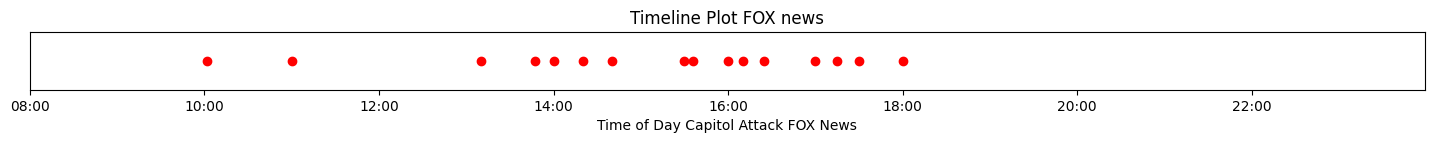

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns


unique_events = set(unique_event_fox)

# Define a color palette with the same number of colors as unique events
colors_test = sns.color_palette('bright', len(unique_events))

# Create a dictionary mapping each event to a color
colors = {}
for i, event in enumerate(unique_events):
    colors[event] = colors_test[i]

        
# convert time strings to datetime objects
datetimes = [datetime.strptime(time, '%H:%M:%S') for time in unique_time_fox]

# create figure and axis objects

fig, ax = plt.subplots(figsize=(18,0.75))
# plot horizontal line for events
#ax.hlines(0.5, datetimes[0], datetimes[-1], color='C0')

# plot time points as dots on the line, with colors corresponding to events
colors_list = [colors[event] for event in unique_event_fox]
ax.scatter(datetimes, [0.5] * len(datetimes), color='red')


# set x-axis format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(datetime.strptime('08:00:00', '%H:%M:%S'), datetime.strptime('23:59:00', '%H:%M:%S'))
ax.set_xlabel('Time of Day Capitol Attack FOX News')

# remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# set plot title
ax.set_title('Timeline Plot FOX news')

# display plot
plt.show()




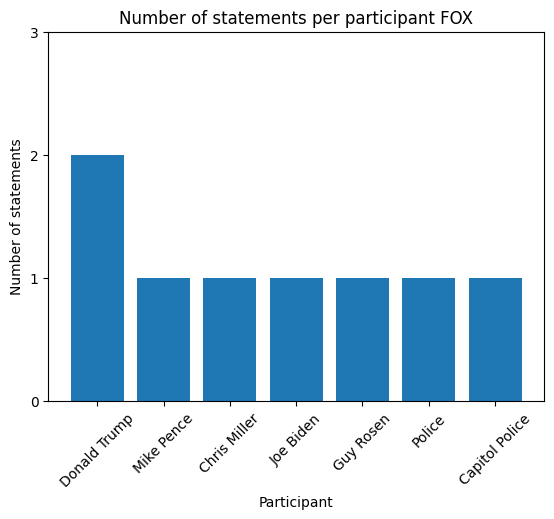

In [10]:
# Data
names = ['Donald Trump', 'Mike Pence', 'Chris Miller', 'Joe Biden', 'Guy Rosen', 'Police', 'Capitol Police']
values = [2, 1, 1, 1, 1, 1, 1]

# Plot
fig, ax = plt.subplots()
ax.bar(names, values)

# Set labels
ax.set_ylabel('Number of statements')
ax.set_xlabel('Participant')
ax.set_title('Number of statements per participant FOX')

# Rotate x-labels
plt.xticks(rotation=45)
yticks = [0,1,2,3]
ax.set_yticks(yticks)

# Show plot
plt.show()

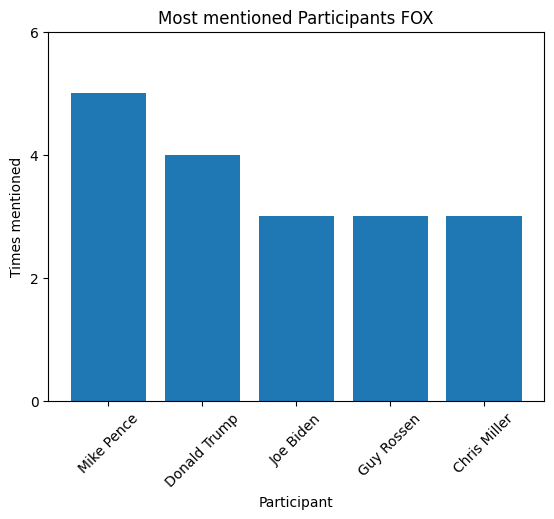

In [11]:
import matplotlib.pyplot as plt
# Data
names = ['Mike Pence', 'Donald Trump', 'Chris Miller', 'Joe Biden', 'Guy Rossen']
values = [5, 4, 3, 3, 3]

# Sort the data by values in descending order
data = sorted(zip(values, names), reverse=True)[:5]
names = [name for value, name in data]
values = [value for value, name in data]

# Plot
fig, ax = plt.subplots()
ax.bar(names, values)

# Set labels
ax.set_ylabel('Times mentioned')
ax.set_xlabel('Participant')
ax.set_title('Most mentioned Participants FOX')

# Rotate x-labels

plt.xticks(rotation=45)
yticks = [0,2,4,6]
ax.set_yticks(yticks)


# Show plot
plt.show()
